# HR Analytics Dataset Analysis using Logistic Regression

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("datasets\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Looking for nulls/cleaning

<AxesSubplot:>

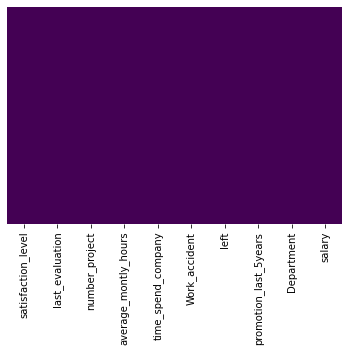

In [33]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [34]:
#just to make sure
df[df.isnull()].count()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Data exploration and visualization

In [9]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [10]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

In [12]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

**Impact of salary on employee retention**

<AxesSubplot:xlabel='salary'>

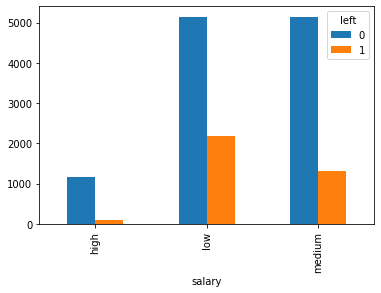

In [13]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

<AxesSubplot:xlabel='Department'>

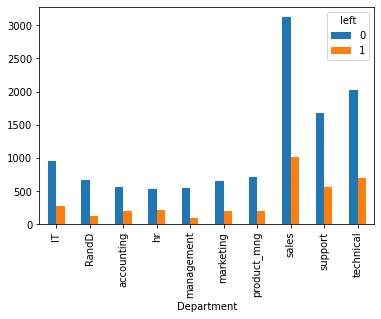

In [14]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

From the data analysis so far we can conclude that we will use following variables as independant variables in our model

1 **Satisfaction Level**
2 **Average Monthly Hours**
3 **Promotion Last 5 Years**
4 **Salary**

In [15]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Tackle salary with dummy variable**

In [19]:
salary_dummies = pd.get_dummies(subdf.salary)
salary_dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [20]:
df_with_dummies  = pd.concat([subdf,salary_dummies], axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [21]:
df_with_dummies.drop(['salary','medium'], axis='columns', inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [24]:
X = df_with_dummies
y = df.left

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [30]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Accuracy of the model

In [31]:
model.score(X_test,y_test)

0.7734285714285715

In [32]:
model.predict_proba(X_test)

array([[0.78259268, 0.21740732],
       [0.8275139 , 0.1724861 ],
       [0.59988579, 0.40011421],
       ...,
       [0.94742913, 0.05257087],
       [0.91556684, 0.08443316],
       [0.81730301, 0.18269699]])